In [4]:
import os
import pickle
from koala.graph_color import color_lattice
from koala.phase_space import analyse_hk, k_hamiltonian_generator
import numpy as np
from koala.hamiltonian import generate_majorana_hamiltonian
from koala import plotting as pl
from koala.flux_finder import n_to_ujk_flipped, fluxes_from_bonds
from matplotlib import pyplot as plt
from scipy import linalg as la
import random
import matplotlib
matplotlib.rcParams.update({'font.size': 13, 'text.usetex': True, 'font.family': 'serif', 'font.serif': ['Computer Modern']})


In [5]:
outliers_location = '/Users/perudornellas/python/imperial/cx1_am_kit/many_systems/outliers.pickle'
with open(outliers_location, 'rb') as f:
    x = pickle.load(f)

Lattice 0 chosen because:  Gapless 


/var/folders/v4/z7wcc4gj6clczcj6vr8b9dvw0000gn/T/ipykernel_29618/772343190.py:25: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if zero_mode_index != []:
/var/folders/v4/z7wcc4gj6clczcj6vr8b9dvw0000gn/T/ipykernel_29618/772343190.py:25: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  if zero_mode_index != []:


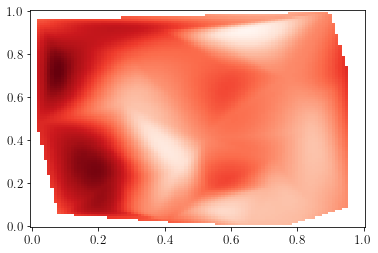

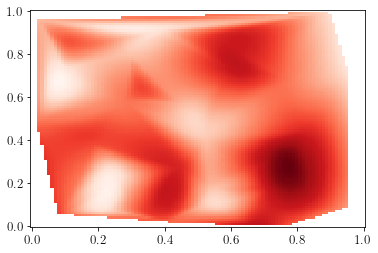

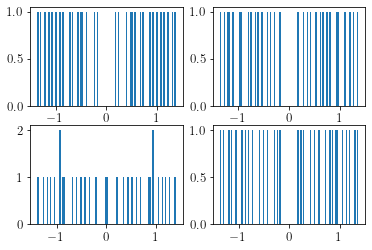

Lattice 1 chosen because:  Gapless 


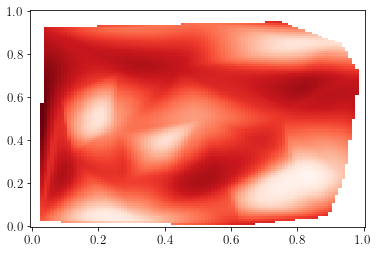

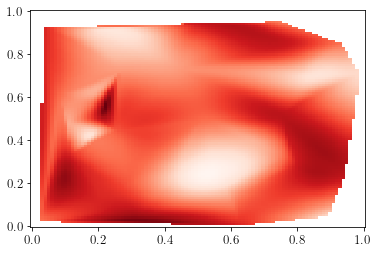

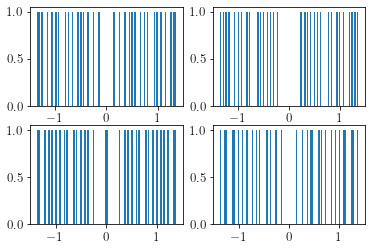

Lattice 2 chosen because:  Gapless 


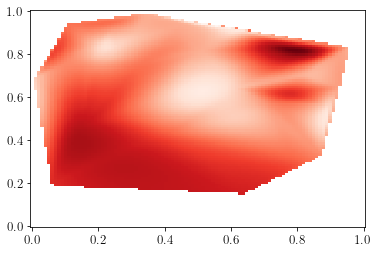

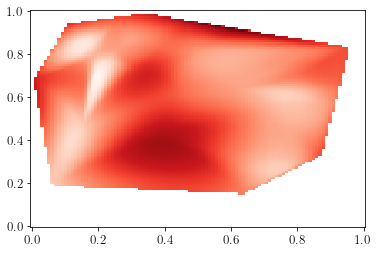

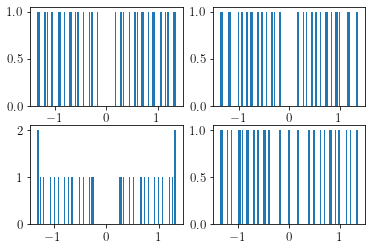

Lattice 3 chosen because:  Gapless 


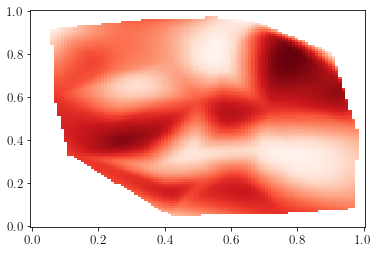

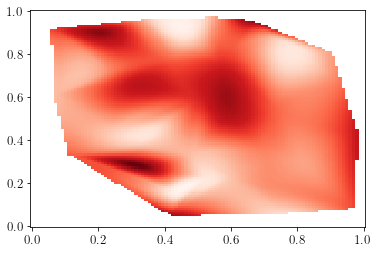

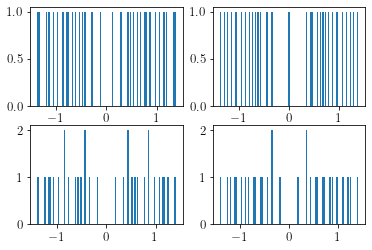

Lattice 4 chosen because:  Gapless 


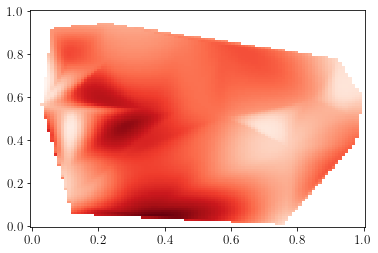

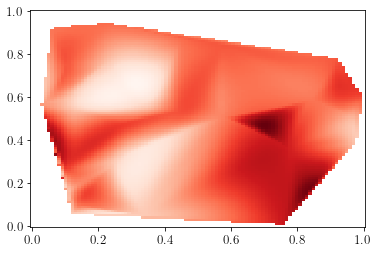

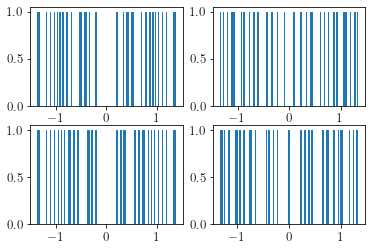

Lattice 5 chosen because:  Gapless 


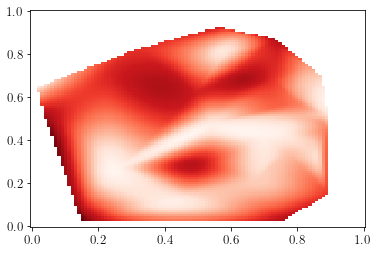

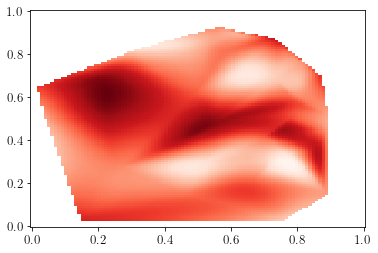

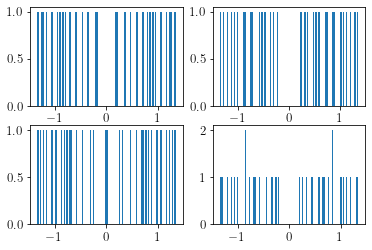

Lattice 6 chosen because:  Gapless 


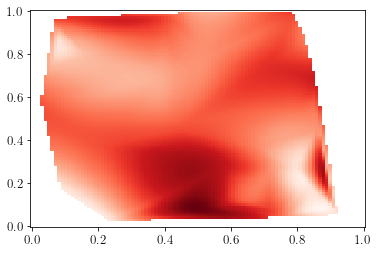

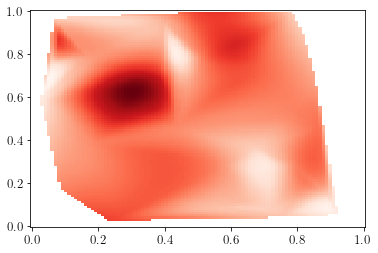

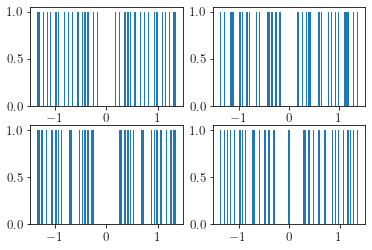

In [7]:
for num,a in enumerate(x):
    print(f'Lattice {num} chosen because: {a[1]}')

    lattice = a[0]['lattice']
    energies = a[0]['energies']
    gaps = a[0]['gaps']
    spanning_tree = a[0]['spanning_tree']
    coloring = color_lattice(lattice)
    J = np.array([1,1,1])

    ujk = np.ones(lattice.n_edges)
    winner = np.argmin(energies)
    winning_ujk = n_to_ujk_flipped(winner, ujk, spanning_tree)

    Hk = k_hamiltonian_generator(lattice, coloring, winning_ujk, J)
    

    e_vals = np.zeros([4,lattice.n_vertices])
    k_examples = np.array([[0,0], [0,np.pi], [np.pi,0], [np.pi,np.pi]])
    for u in range(4):
        k = k_examples[u]
        e_vals[u,:], v = la.eigh(Hk(k))
        zero_mode_index = np.where(np.abs(e_vals[u,:])<1e-10)[0]
        # print(zero_mode_index)
        if zero_mode_index != []:
            for i in zero_mode_index:
                pl.plot_scalar(lattice, np.abs(v[:,i]), cmap= 'Reds')
                plt.show()
    
    fig, axes = plt.subplots(2,2)
    for n, ax in enumerate(axes.flatten()):
        ax.hist(e_vals[n], 100)
    plt.show()